In [1]:
def prune(input_list):
    l = []

    for e in input_list:
        e = e.strip() # remove the leading and trailing characters, here space
        if e != '' and e != ' ':
            l.append(e)

    return l

In [2]:
def result_plot(file=None):
    hub_acc_list = []
    fxp_o_acc_list = []
    fxp_i_acc_list = []
    csv_file = open(file, 'r')
    first = True
    for row in csv_file:
        if first is True:
            first = False
            continue
            
        elems = row.strip().split(',')
        elems = prune(elems)
        hub_acc_list.append(float(elems[1]))
        fxp_o_acc_list.append(float(elems[3]))
        fxp_i_acc_list.append(float(elems[5]))
    csv_file.close()
    return hub_acc_list, fxp_o_acc_list, fxp_i_acc_list

In [3]:
convnet_mnist_hub_acc, convnet_mnist_fxp_o_acc, convnet_mnist_fxp_i_acc = result_plot(file="../convnet_mnist/convnet_mnist_result.csv")
del convnet_mnist_hub_acc[-2]
del convnet_mnist_fxp_o_acc[-2]
del convnet_mnist_fxp_i_acc[-2]

print(convnet_mnist_hub_acc)
print(convnet_mnist_fxp_o_acc)
print(convnet_mnist_fxp_i_acc)

[98.94, 98.98, 99.03, 99.07, 99.06, 99.07, 99.04, 99.17]
[95.46, 98.04, 98.86, 98.98, 98.87, 99.01, 99.02, 99.17]
[99.02, 99.02, 99.04, 99.04, 99.04, 99.04, 99.04, 99.17]


In [4]:
resnet18_cifar10_hub_acc, resnet18_cifar10_fxp_o_acc, resnet18_cifar10_fxp_i_acc = result_plot(file="../resnet18_cifar10/resnet18_cifar10_result.csv")
del resnet18_cifar10_hub_acc[-2]
del resnet18_cifar10_fxp_o_acc[-2]
del resnet18_cifar10_fxp_i_acc[-2]

print(resnet18_cifar10_hub_acc)
print(resnet18_cifar10_fxp_o_acc)
print(resnet18_cifar10_fxp_i_acc)

[19.5, 77.44, 92.31, 94.39, 94.6, 94.7, 94.77, 95.38]
[71.92, 82.26, 91.37, 92.18, 94.15, 94.28, 94.57, 95.38]
[94.52, 94.78, 94.78, 94.77, 94.79, 94.81, 94.8, 95.38]


In [5]:
alexnet_imagenet_hub_acc, alexnet_imagenet_fxp_o_acc, alexnet_imagenet_fxp_i_acc = result_plot(file="../alexnet_imagenet/alexnet_imagenet_result.csv")
del alexnet_imagenet_hub_acc[-2]
del alexnet_imagenet_fxp_o_acc[-2]
del alexnet_imagenet_fxp_i_acc[-2]

print(alexnet_imagenet_hub_acc)
print(alexnet_imagenet_fxp_o_acc)
print(alexnet_imagenet_fxp_i_acc)

[0.13, 0.24, 2.474, 21.672, 42.438, 50.402, 53.452, 56.55]
[0.13, 0.74, 0.964, 17.108, 18.508, 46.988, 49.036, 56.55]
[48.66, 53.656, 54.694, 54.772, 54.932, 54.962, 54.976, 56.55]


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

font = {'family':'Times New Roman', 'size': 6}

matplotlib.rc('font', **font)

In [7]:
def autolabel(rects, data):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height < data - 5 or height == data:
            ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [8]:
my_dpi = 300
fig_h = 1
fig_w = 3.3115
alpha = 1

95 100


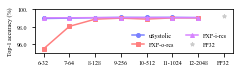

In [9]:
labels = ['6-32', '7-64', '8-128', '9-256', '10-512', '11-1024', '12-2048']
x = np.arange(len(labels))  # the label locations
data1 = convnet_mnist_hub_acc[0:len(convnet_mnist_hub_acc)-1]
data2 = convnet_mnist_fxp_o_acc[0:len(convnet_mnist_fxp_o_acc)-1]
data3 = convnet_mnist_fxp_i_acc[0:len(convnet_mnist_fxp_i_acc)-1]
data4 = convnet_mnist_fxp_i_acc[-1]

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(fig_w, fig_h), sharex=True)
fig, ax1 = plt.subplots(figsize=(fig_w, fig_h))

ax1.plot(x, data1, "-o", label="uSystolic", alpha=alpha, color="#7A81FF", ms=4)
ax1.plot(x, data2, "-s", label="FXP-o-res", alpha=alpha, color="#FF7F7F", ms=4)
ax1.plot(x, data3, "-^", label="FXP-i-res", alpha=alpha, color="#D783FF", ms=4)
ax1.plot([x[-1]+1], data4, "*", label="FP32", color="#CCCCCC", ms=4)

x = np.append(x, x[-1]+1)
labels.append('FP32')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_ylabel('Top-1 accuracy (%)')
bot = int(math.floor(min([min(data1), min(data2), min(data3), data4]) / 5) * 5)
top = int(math.ceil( max([max(data1), max(data2), max(data3), data4]) / 5) * 5)
print(bot, top)
ax1.set_ylim(bot, top)
ax1.set_yticks([96, 98, 100])
ax1.set_yticklabels(["96.0", "98.0", "100."])

ax1.legend(loc="lower right", ncol=2, frameon=False)

fig.tight_layout()
plt.show()
fig.savefig("convnet_mnist_acc.pdf", bbox_inches='tight', dpi=my_dpi)

15 100


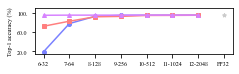

In [10]:
labels = ['6-32', '7-64', '8-128', '9-256', '10-512', '11-1024', '12-2048']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
data1 = resnet18_cifar10_hub_acc[0:len(resnet18_cifar10_hub_acc)-1]
data2 = resnet18_cifar10_fxp_o_acc[0:len(resnet18_cifar10_fxp_o_acc)-1]
data3 = resnet18_cifar10_fxp_i_acc[0:len(resnet18_cifar10_fxp_i_acc)-1]
data4 = resnet18_cifar10_fxp_i_acc[-1]

fig, ax2 = plt.subplots(figsize=(fig_w, fig_h))

ax2.plot(x, data1, "-o", label="uSystolic", alpha=alpha, color="#7A81FF", ms=4)
ax2.plot(x, data2, "-s", label="FXP-o-res", alpha=alpha, color="#FF7F7F", ms=4)
ax2.plot(x, data3, "-^", label="FXP-i-res", alpha=alpha, color="#D783FF", ms=4)
ax2.plot([x[-1]+1], data4, "*", label="FP32", color="#CCCCCC", ms=4)

x = np.append(x, x[-1]+1)
labels.append('FP32')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_ylabel('Top-1 accuracy (%)')
bot = int(math.floor(min([min(data1), min(data2), min(data3), data4]) / 5) * 5)
top = int(math.ceil( max([max(data1), max(data2), max(data3), data4]) / 5) * 5)
print(bot, top)
ax2.set_ylim(bot, top+10)
ax2.set_yticks([20, 60, 100])
ax2.set_yticklabels(["20.0", "60.0", "100."])

fig.tight_layout()
plt.show()
fig.savefig("resnet18_cifar10_acc.pdf", bbox_inches='tight', dpi=my_dpi)

0 60


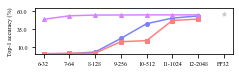

In [11]:
labels = ['6-32', '7-64', '8-128', '9-256', '10-512', '11-1024', '12-2048']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
data1 = alexnet_imagenet_hub_acc[0:len(alexnet_imagenet_hub_acc)-1]
data2 = alexnet_imagenet_fxp_o_acc[0:len(alexnet_imagenet_fxp_o_acc)-1]
data3 = alexnet_imagenet_fxp_i_acc[0:len(alexnet_imagenet_fxp_i_acc)-1]
data4 = alexnet_imagenet_fxp_i_acc[-1]

fig, ax3 = plt.subplots(figsize=(fig_w, fig_h))

ax3.plot(x, data1, "-o", label="uSystolic", alpha=alpha, color="#7A81FF", ms=4)
ax3.plot(x, data2, "-s", label="FXP-o-res", alpha=alpha, color="#FF7F7F", ms=4)
ax3.plot(x, data3, "-^", label="FXP-i-res", alpha=alpha, color="#D783FF", ms=4)
ax3.plot([x[-1]+1], data4, "*", label="FP32", color="#CCCCCC", ms=4)

x = np.append(x, x[-1]+1)
labels.append('FP32')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
ax3.set_ylabel('Top-1 accuracy (%)')
bot = int(math.floor(min([min(data1), min(data2), min(data3), data4]) / 5) * 5)
top = int(math.ceil( max([max(data1), max(data2), max(data3), data4]) / 5) * 5)
print(bot, top)
ax3.set_ylim(bot, top+5)
ax3.set_yticks([10, 35, 60])
ax3.set_yticklabels(["10.0", "35.0", "60.0"])

fig.tight_layout()
plt.show()
fig.savefig("alexnet_imagenet_acc.pdf", bbox_inches='tight', dpi=my_dpi)